In [1786]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

In [1787]:
# Import required Python libraries

In [1788]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1789]:
# Reading the dataset using a method in the Pandas library

In [1790]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1791]:
# Get more information from the dataset with the help of a method from Pandas
# We have a number of nulls in the Age and Cabin and Embarked columns

<Axes: xlabel='Survived', ylabel='count'>

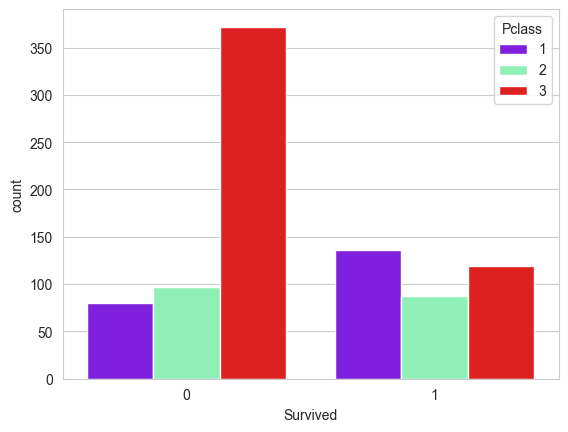

In [1792]:
sns.countplot(x='Survived' ,hue='Pclass' ,data=data,palette='rainbow')

In [1793]:
# Drawing a graph from the Seaborn library to discover a pattern between the Pclass variable and the survivors

<Axes: xlabel='Survived', ylabel='count'>

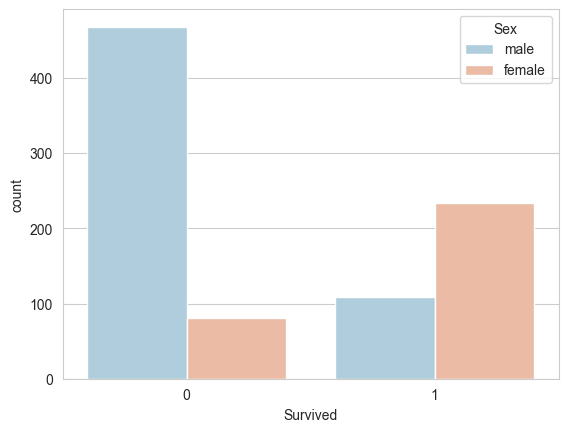

In [1794]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data,palette='RdBu_r')

In [1795]:
# Drawing a graph from the Seaborn library to discover a pattern between the Sex variable and the survivors
# According to the graph, 2 times more women survived than men

<Axes: ylabel='Frequency'>

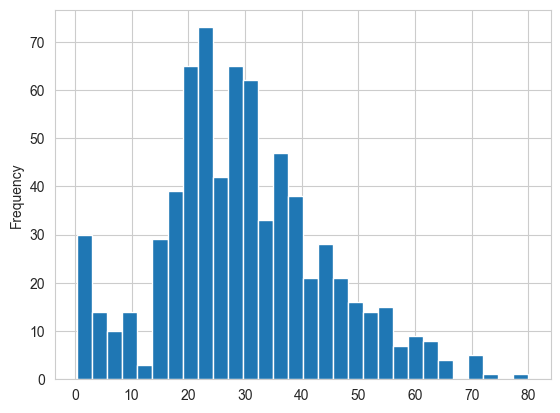

In [1796]:
data.dropna(subset=['Age'], axis=0)
data['Age'].plot.hist(bins=30)

In [1797]:
# Temporary removal of null data from the age column and visual inspection of the age column data

<Axes: xlabel='Pclass', ylabel='Age'>

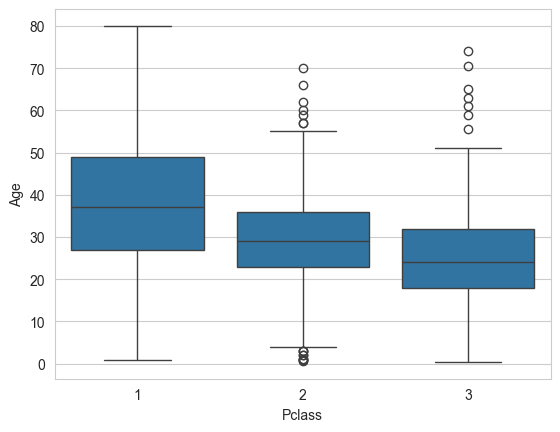

In [1798]:
sns.boxplot(x='Pclass', y='Age', data=data)

In [1799]:
# Checking the age of people in each cabin with the help of Seaborn Library

In [1800]:
data[data['Pclass']==1]['Age'].mean(), data[data['Pclass']==2]['Age'].mean(), data[data['Pclass']==3]['Age'].mean()

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [1801]:
# Get the average age value of the people in each column

In [1802]:
def impute_age (row):
    Age = row['Age']
    Pclass = row['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [1803]:
# Define a function to replace the average age in each Pclass instead of nulls 

In [1804]:
data['Age'] = data.apply(impute_age,axis=1)

In [1805]:
# Use the apply method to apply changes to the dataframe.

In [1806]:
data.drop('Cabin' ,axis=1,inplace=True)

In [1807]:
#Removing the cabin column due to the small number of data and the insignificant effect of this column on the mortality rate

In [1808]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1809]:
# Checking the number of variables in the Embarked column

In [1810]:
data['Embarked'].replace(np.nan, 'S', inplace=True)

In [1811]:
# Filling the blanks of the Embarked column with the mod method

In [1812]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [1813]:
# Double check to make sure all null values ​​are inserted

In [1814]:
 sex= pd.get_dummies(data['Sex'],drop_first=True).astype(int) #sex
 embark= pd.get_dummies(data['Embarked'],drop_first=True).astype(int) #embark
 pclass= pd.get_dummies(data['Pclass'],drop_first=True).astype(int) #Pclass

In [1815]:
# To understand our model, we binarize the categorical data

In [1816]:
data.drop(['PassengerId','Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
train = pd.concat([data,sex,embark,pclass],axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [1817]:
# Dropping extra columns and pasting new columns into the dataframe

In [1818]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

In [1819]:
# Separate the Training and testing categories from the Sklearn library in such a way that we keep 30% of the dataset as testing

In [1820]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Choosing the logistic regression algorithm to create the model

In [1821]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Transforming name type of columns to strings

In [1822]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [1823]:
# Create a logistic regression model with the number of iterantions increased to 200
# Train the model using the training dat

In [1824]:
predictions = logmodel.predict(X_test)

In [ ]:
# defined the test model here

In [1825]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[137,  17],
       [ 38,  76]], dtype=int64)

In [1826]:
# Resualt of test

In [1827]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [ ]:
# Displays precision , recall , f1-score and support for each class , along with marco and weighted avarages.